In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Load the data
df = pd.read_csv('/content/Country-data.csv')

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [74]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


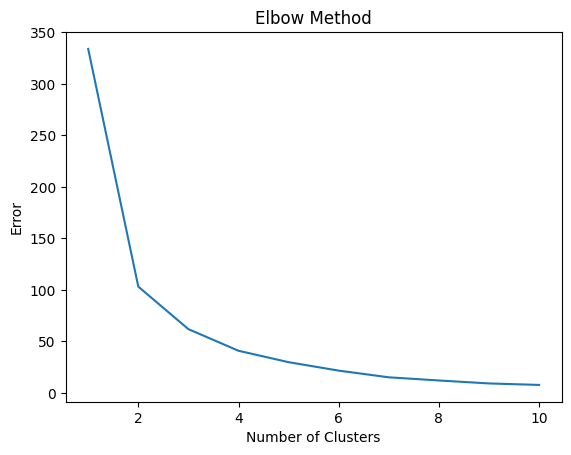

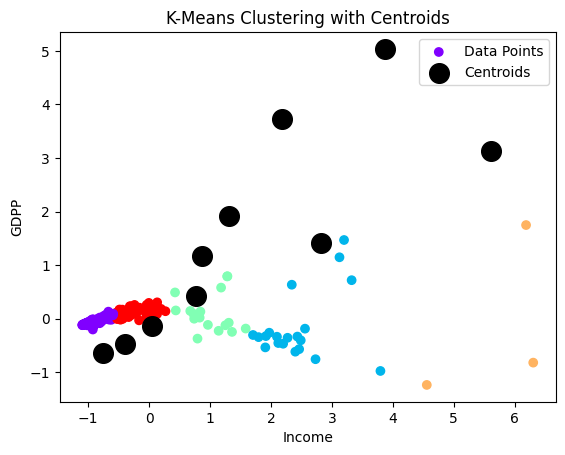

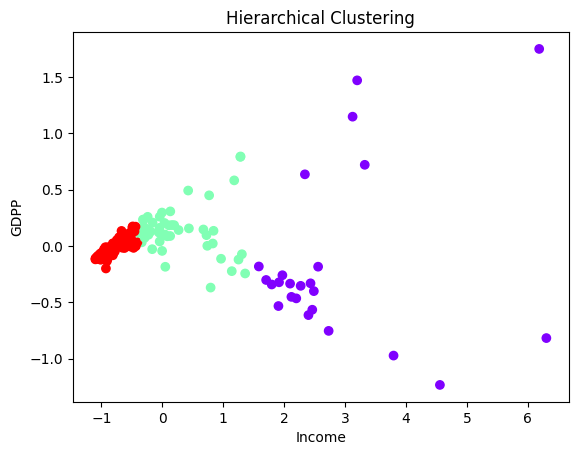

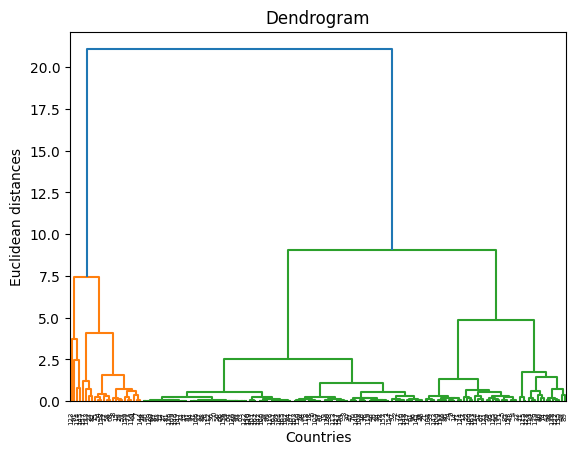

In [81]:
# Selecting relevant features
x = df.iloc[:, [5, 9]].values

# Standardize the data for K-Means and PCA
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# K-Means clustering
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(x_standardized)

# Elbow Method to determine the optimal number of clusters for K-Means
error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_standardized)
    error.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), error)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_standardized)

# Plot K-Means clustering with centroids
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, cmap='rainbow', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.legend()
plt.show()

# Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_standardized)

# Visualize Hierarchical clustering results
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_hc, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.show()

# Hierarchical Clustering
dendrogram = sch.dendrogram(sch.linkage(x_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()
